# CNN Impulse Classification

In [21]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
import time
from tqdm import tqdm

from scipy import stats

import sys
sys.path.append("..")
from utils.load_Xy import *
from utils.utils import plot_data

import torch
import torch.nn as nn
import torch.utils.data as utils
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from utils.cnn import CNN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ns = np.array([10,50,100,200,400,1000,2000])
n0 = int(max(ns) / 2)
n1 = n0
n_test = 10000

X_train,y_train,_ = load_impulse_Xy(n0,n1,ns,seed=0)
X_test,y_test,size_dict = load_impulse_Xy(int(n_test/2),int(n_test/2),ns,seed=1)

In [17]:
## Setup for run
names = {"CNN":"#cab2d6"}

# Hyperparameters
num_epochs = 100
learning_rate = 0.001
num_cnn_runs = 5
num_runs=5

classifiers = [
    CNN(num_epochs=num_epochs, learning_rate=learning_rate, verbose=False)
    ]

In [22]:
# Train each classifier on each dataset size, then test
## Prep output file:
np.random.seed(1234)

save_dir = Path('.')
write_path = save_dir / 'impulse_results_cnn.csv'
f = open(write_path, 'w+')
f.write("classifier,n,Lhat,trainTime,testTime,iterate\n")
f.flush()

runList = [(n, clf, run) for n in ns\
                       for clf in zip(classifiers, [key for key in names])\
                       for run in range(num_runs)]

for n, clf, iteration in tqdm(runList):
    trainStartTime = time.time()
    clf[0].fit(X_train[:n], y_train[:n])
    trainEndTime = time.time()
    trainTime = trainEndTime - trainStartTime

    testStartTime = time.time()
    yhat = clf[0].predict(X_test)
    testEndTime = time.time()
    testTime = testEndTime - testStartTime

    lhat = np.mean(np.not_equal(yhat, y_test).astype(int))

    ####("variable,Lhat,trainTime,testTime,iterate")
    f.write(f"{clf[1]}, {n}, {lhat:2.9f}, {trainTime:2.9f}, {testTime:2.9f}, {iteration}\n")
    f.flush()

f.close()

3%|▎         | 1/35 [00:00<00:07,  4.41it/s]Epoch [5/100], Step [1/1], Loss: 0.0935, Accuracy: 100.00%
Epoch [10/100], Step [1/1], Loss: 0.0066, Accuracy: 100.00%
Epoch [15/100], Step [1/1], Loss: 0.0020, Accuracy: 100.00%
  6%|▌         | 2/35 [00:00<00:06,  5.01it/s]Epoch [5/100], Step [1/1], Loss: 0.6711, Accuracy: 60.00%
Epoch [10/100], Step [1/1], Loss: 0.0000, Accuracy: 100.00%
Epoch [5/100], Step [1/1], Loss: 0.0019, Accuracy: 100.00%
Epoch [10/100], Step [1/1], Loss: 0.0001, Accuracy: 100.00%
 11%|█▏        | 4/35 [00:00<00:06,  4.78it/s]Epoch [5/100], Step [1/1], Loss: 0.0000, Accuracy: 100.00%
Epoch [10/100], Step [1/1], Loss: 0.0000, Accuracy: 100.00%
Epoch [5/100], Step [1/1], Loss: 0.0000, Accuracy: 100.00%
Epoch [10/100], Step [1/1], Loss: 0.0000, Accuracy: 100.00%
 14%|█▍        | 5/35 [00:00<00:05,  5.26it/s]Epoch [5/100], Step [1/1], Loss: 0.2768, Accuracy: 90.00%
Epoch [10/100], Step [1/1], Loss: 0.0012, Accuracy: 100.00%
 17%|█▋        | 6/35 [00:01<00:07,  3.85it/s]

## Plot

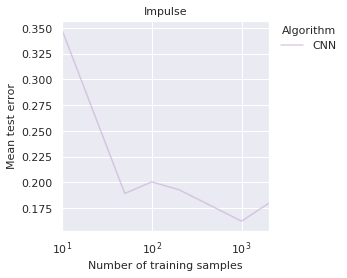

In [24]:
plot_data([write_path],names,title='Impulse')